<a href="https://colab.research.google.com/github/ytuCeAraProjeEmoji/emojiML_NaiveBayes_SVM/blob/main/MACHINE_LEARNING_BAYES_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
text_data_corpus = pd.read_csv('Train3.csv', encoding='latin-1')


In [ ]:
text_data_corpus[text_data_corpus['Label'].isnull()]

,Unnamed: 0,TEXT,Label


In [ ]:
text_data_corpus = text_data_corpus.drop(['Unnamed: 0'], axis = 1)

In [ ]:
mapp = {0: '😜', 1: '📸', 2: '💙', 3: '❤'}
mapp

{0: '😜', 1: '📸', 2: '💙', 3: '❤'}

In [ ]:
import random
text_data_corpus=text_data_corpus.sample(frac=1).reset_index(drop=True)
text_data_corpus = text_data_corpus
text_data_corpus

,TEXT,Label
0,Pick ups #ElCamino @ Casa Agria Specialty Ales\n,JOY
1,Missing those beautiful Carolina nights and be...,DARKHEART
2,"It's a good day. I love you both, @user &amp; ...",VACATION
3,I ï¸ my Jordan's @user #sneakerhead #standupc...,DARKHEART
4,At my parents house for Christmas! picture @us...,VACATION
...,...,...
69995,"If you do it right, you'll love where you are....",DARKHEART
69996,"Lol only in ny goinnayubeddddd @ New York, New...",JOY
69997,I feel like this picture perfectly captures us...,JOY
69998,"Times Square Olive Garden @ Times Square, New ...",JOY


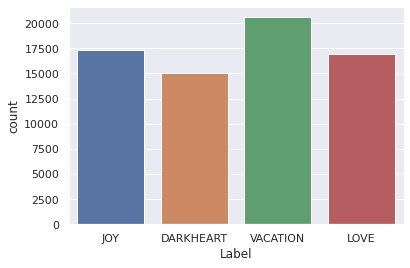

In [ ]:
sns.countplot(x=text_data_corpus['Label'], data=text_data_corpus)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_data_corpus['TEXT'] = [word_tokenize(entry) for entry in text_data_corpus['TEXT']]

In [ ]:
text_data_corpus['TEXT']

0        [Pick, ups, #, ElCamino, @, Casa, Agria, Speci...
1        [Missing, those, beautiful, Carolina, nights, ...
2        [It, 's, a, good, day, ., I, love, you, both, ...
3        [I, ï¸, my, Jordan, 's, @, user, #, sneakerhe...
4        [At, my, parents, house, for, Christmas, !, pi...
                               ...                        
69995    [If, you, do, it, right, ,, you, 'll, love, wh...
69996    [Lol, only, in, ny, goinnayubeddddd, @, New, Y...
69997    [I, feel, like, this, picture, perfectly, capt...
69998    [Times, Square, Olive, Garden, @, Times, Squar...
69999    [Gorgeous, driveway, lineup, courtesy, of, den...
Name: TEXT, Length: 70000, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#train data corpus

for index,entry in enumerate(text_data_corpus['TEXT']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    text_data_corpus.loc[index,'TEXT_FINAL'] = str(Final_words)

In [ ]:
text_data_corpus.head()

,TEXT,Label,TEXT_FINAL
0,"[Pick, ups, #, ElCamino, @, Casa, Agria, Speci...",JOY,"['Pick', 'ups', 'ElCamino', 'Casa', 'Agria', '..."
1,"[Missing, those, beautiful, Carolina, nights, ...",DARKHEART,"['Missing', 'beautiful', 'Carolina', 'night', ..."
2,"[It, 's, a, good, day, ., I, love, you, both, ...",VACATION,"['It', 'good', 'day', 'I', 'love', 'user', 'am..."
3,"[I, ï¸, my, Jordan, 's, @, user, #, sneakerhe...",DARKHEART,"['I', 'Jordan', 'user', 'sneakerhead', 'standu..."
4,"[At, my, parents, house, for, Christmas, !, pi...",VACATION,"['At', 'parent', 'house', 'Christmas', 'pictur..."


In [ ]:
Train_X, Test_X,Train_Y, Test_Y = model_selection.train_test_split(text_data_corpus['TEXT_FINAL'],
                                                                    text_data_corpus['Label'],
                                                                    test_size=0.6, random_state=42)

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Train_Y

array([3, 3, 3, ..., 0, 3, 2])

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features = 5000)
Tfidf_vect.fit(text_data_corpus['TEXT_FINAL'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
pd.DataFrame(Train_X_Tfidf.toarray(), columns = Tfidf_vect.get_feature_names())

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf, Train_Y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Train_X)
X_train_counts.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', Naive),])
text_clf=text_clf.fit(Train_X, Train_Y)

In [ ]:
predicted = text_clf.predict(Test_X)
np.mean(predicted == Test_Y)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y, predicted)
print(cm)

In [ ]:
import matplotlib.pyplot as plt
mat = confusion_matrix(Test_Y, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Test_Y, predicted,
                            #target_names = mapping.emoticons
                           ))

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge',
                                                   penalty='l2',
                                                   alpha=1e-3, 
                                                   random_state=42)),
                         ])
text_clf_svm.fit(Train_X, Train_Y)

    
predicted_svm = text_clf_svm.predict(Test_X)


np.mean(predicted_svm == Test_Y)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y, predicted_svm)
print(cm)

In [ ]:
mat = confusion_matrix(Test_Y, predicted_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Test_Y, predicted_svm,
                            ))

In [ ]:
Train_X_Tfidf.toarray()

In [ ]:
SVM = svm.SVC(C=1.0, kernel='poly', degree=8, gamma='auto')
SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM.fit(Train_X_Tfidf, Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y)*100)

In [ ]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l  = {0: '😜', 1: '📸', 2: '💙', 3: '❤'}

df_cm = pd.DataFrame(mat, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()